# Case Study: 6/25/2023

## Case Overview

There was an intense rain event which impacted the Upper Midwest on the morning of June 25, 2023, with rainfall totals greater than >1". Here is a map from the CoCoRahs network.
![cocorahs map june 25, 2023](images/cocorahs-june-25-2023.png)

## Imports

In [98]:
#IMPORTS
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import act
from act.io.armfiles import read_netcdf
from act.plotting import TimeSeriesDisplay
import fsspec
from datetime import date
from scipy import stats
import pint_xarray

## Configruation and Functions
Helper functions and metadata information

In [52]:
# Renaming of variables and adding units to each variable.
# THIS IS FOR AMB_001
attrs_dict_ambient = {'tempf': {'standard_name': 'Temperature',
                                'units': 'degF'},
                      'tempinf': {'standard_name': 'Temperature',
                                  'units': 'degF'},
                      'feelsLike': {'standard_name': 'Feels Like Temperature',
                                    'units': 'degF'},
                      'dewPoint': {'standard_name': 'Dewpoint Temperature',
                                   'units': 'degF'},
                      'dewPointin': {'standard_name': 'Dewpoint Temperature',
                                     'units': 'degF'},
                      'windspeedmph': {'standard_name': 'Wind Speed',
                                       'units': 'mph'},
                      'winddir': {'standard_name': ' Wind Direction',
                                  'units': 'Degrees 0-360'},
                      'windgustmph': {'standard_name': 'Wind Gust last 10 min',
                                      'units': 'mph'},
                      'windgustdir': {'standard_name': 'Wind direction of gust',
                                      'units': 'Degrees 0-360'},
                      'hourlyrainin': {'standard_name': 'Hourly Rain Rate',
                                       'units': 'in/hr'},
                      'dailyrainin': {'standard_name': 'Daily Rain',
                                      'units': 'inches'},
                      'eventrainin': {'standard_name': 'Event Rain',
                                      'units': 'inches'},
                      'baromrelin': {'standard_name': 'Relative Pressure',
                                     'units': 'inHg'},
                      'baromabsin': {'standard_name': 'Absolute Pressure',
                                     'units': 'inHg'},
                      'solarradiation': {'standard_name': 'Solar Radiation',
                                         'units': 'W/m^2'},
                      'pm25': {'standard_name': 'PM 2.5',
                               'units': 'ug/m^3'},
                      'pm25_24h': {'standard_name': 'PM2.5 Air Quality 24 hour average',
                                   'units': 'ug/m^3'},
                      'battout': {'standard_name': 'Outdoor Battery',
                                  'units': '1=ok,0=low'},
                      'batt_25': {'standard_name': 'PM 2.5 Battery Power',
                                  'units': '1=ok,0=low'}}

variable_mapping_ambient = {'date': 'time',
                            'tempf': 'outdoor_temperature',
                            'tempinf': 'indoor_temperature',
                            'dewPoint': 'outdoor_dewpoint',
                            'dewPointin': 'indoor_dewpoint',
                            'feelsLike': 'feelslike_temperature',
                            'winddir': 'wind_direction',
                            'windspeedmph': 'wind_speed',
                            'windgustmph': 'wind_gust',
                            'windgustdir': 'wind_gust_direction',
                            'hourlyrainin': 'hourly_rain',
                            'dailyrainin': 'daily_rain',
                            'eventrainin': 'event_rain',
                            'baromrelin': 'relative_pressure',
                            'baromabsin': 'absolute_pressure',
                            'solarradiation': 'solar_radiation',
                            'pm25': 'pm25_outdoor',
                            'pm25_24h': 'pm25_24hr',
                            'battout': 'station_battery',
                            'batt_25': 'pm25_battery'
                            }

In [53]:
#THIS IS FOR AMB_004 ON 6/25/23, IT WAS MISSING PM25 DATA SO I HAD T DELETE THAT IN THE RENAMING PROCESS
attrs_dict_ambient_004 = {'tempf': {'standard_name': 'Temperature',
                                'units': 'degF'},
                      'tempinf': {'standard_name': 'Temperature',
                                  'units': 'degF'},
                      'feelsLike': {'standard_name': 'Feels Like Temperature',
                                    'units': 'degF'},
                      'dewPoint': {'standard_name': 'Dewpoint Temperature',
                                   'units': 'degF'},
                      'dewPointin': {'standard_name': 'Dewpoint Temperature',
                                     'units': 'degF'},
                      'windspeedmph': {'standard_name': 'Wind Speed',
                                       'units': 'mph'},
                      'winddir': {'standard_name': ' Wind Direction',
                                  'units': 'Degrees 0-360'},
                      'windgustmph': {'standard_name': 'Wind Gust last 10 min',
                                      'units': 'mph'},
                      'windgustdir': {'standard_name': 'Wind direction of gust',
                                      'units': 'Degrees 0-360'},
                      'hourlyrainin': {'standard_name': 'Hourly Rain Rate',
                                       'units': 'in/hr'},
                      'dailyrainin': {'standard_name': 'Daily Rain',
                                      'units': 'inches'},
                      'eventrainin': {'standard_name': 'Event Rain',
                                      'units': 'inches'},
                      'baromrelin': {'standard_name': 'Relative Pressure',
                                     'units': 'inHg'},
                      'baromabsin': {'standard_name': 'Absolute Pressure',
                                     'units': 'inHg'},
                      'solarradiation': {'standard_name': 'Solar Radiation',
                                         'units': 'W/m^2'},
                      'battout': {'standard_name': 'Outdoor Battery',
                                  'units': '1=ok,0=low'},
                      'batt_25': {'standard_name': 'PM 2.5 Battery Power',
                                  'units': '1=ok,0=low'}}

variable_mapping_ambient_004 = {'date': 'time',
                            'tempf': 'outdoor_temperature',
                            'tempinf': 'indoor_temperature',
                            'dewPoint': 'outdoor_dewpoint',
                            'dewPointin': 'indoor_dewpoint',
                            'feelsLike': 'feelslike_temperature',
                            'winddir': 'wind_direction',
                            'windspeedmph': 'wind_speed',
                            'windgustmph': 'wind_gust',
                            'windgustdir': 'wind_gust_direction',
                            'hourlyrainin': 'hourly_rain',
                            'dailyrainin': 'daily_rain',
                            'eventrainin': 'event_rain',
                            'baromrelin': 'relative_pressure',
                            'baromabsin': 'absolute_pressure',
                            'solarradiation': 'solar_radiation',
                            'battout': 'station_battery',
                            'batt_25': 'pm25_battery'
                            }

## Read the Data
We use some different tools to read in the data from Github

In [54]:
# Opens ambient weather for selected date off of CROCUS github
# To pull today's date
today = date.today()
date_format = today.strftime("%Y%m%d")
# Splice the date into the format needed to pull Ambient Data
#year = date_format[0:4]
year='2023'
#month = date_format[4:6]
month = '06'
#day = date_format[6:8]
day= '25'

#access the data
github_url_001 = (
    'https://github.com/CROCUS-Urban/instrument-cookbooks/raw/main/data/surface-meteorology/'+year+'/'+month+'/'+day+'/'+'CMS-AMB-001.a1.'+year+month+day+'.000000.nc#mode=bytes')

github_url_004 = (
    'https://github.com/CROCUS-Urban/instrument-cookbooks/raw/main/data/surface-meteorology/'+year+'/'+month+'/'+day+'/'+'CMS-AMB-004.a1.'+year+month+day+'.000000.nc#mode=bytes')
 


#this is the url for the data that is older and in one .nc file instead of two
    #'https://github.com/CROCUS-Urban/instrument-cookbooks/raw/main/data/surface-meteorology/'+year+'/'+month+'/'+day+'/'+'ambient.a1.'+year+month+day+'.nc#mode=bytes'

# Opens the file off of github
ncfile_001 = fsspec.open(github_url_001)
ncfile_004 = fsspec.open(github_url_004)
ds_ambient_001 = xr.open_dataset(ncfile_001.open(), engine='h5netcdf')
ds_ambient_004 = xr.open_dataset(ncfile_004.open(), engine='h5netcdf')

### Process the Data
After initially reading the data, we can apply the processing.

In [55]:
#Looping through to rename variables for amb_001
for variable in attrs_dict_ambient.keys():
    if variable in list(ds_ambient_001.variables):
        ds_ambient_001[variable].attrs = attrs_dict_ambient[variable]

#Lists what variables we can pull and what they provide to have a common name list.
theirvariables = sorted(list(ds_ambient_001.variables))
ourvariables = sorted(list(variable_mapping_ambient.keys()))
sharedvariables = dict()
for variable in theirvariables:
    if variable in ourvariables:
        sharedvariables[variable] = variable_mapping_ambient[variable]
        
        
########################################################################################################


#Looping through to rename variables for amb_004        
for variable in attrs_dict_ambient_004.keys():
    if variable in list(ds_ambient_004.variables):
        ds_ambient_004[variable].attrs = attrs_dict_ambient_004[variable]

#Lists what variables we can pull and what they provide to have a common name list.
theirvariables = sorted(list(ds_ambient_004.variables))
ourvariables = sorted(list(variable_mapping_ambient_004.keys()))
sharedvariables = dict()
for variable in theirvariables:
    if variable in ourvariables:
        sharedvariables[variable] = variable_mapping_ambient_004[variable]
        
#Rename variables
ds_ambient_001 = ds_ambient_001.rename(sharedvariables)
ds_ambient_004 = ds_ambient_004.rename(sharedvariables)

### Load the Data
After our data transformations, we need to eagerly read in the data.

In [56]:
##################################  AMBIENT DATA ##################################

#load the variables, some for amb_001 and amb_004 so only one needed
ds_ambient_001.load()

#to double check you can run amb_004 but it is the
#ds_ambient_004.load()

<xarray.Dataset>
Dimensions:                (time: 281, station: 1)
Coordinates:
  * time                   (time) datetime64[ns] 2023-06-25 ... 2023-06-25T23...
  * station                (station) object 'CMS-AMB-001'
Data variables: (12/24)
    dateutc                (station, time) int64 1687651200000 ... 1687735200000
    outdoor_temperature    (station, time) float64 85.82 85.46 ... 73.22 73.4
    humidity               (station, time) int64 38 39 39 40 39 ... 65 65 65 65
    wind_speed             (station, time) float64 2.46 1.12 ... 11.63 17.22
    wind_gust              (station, time) float64 6.93 2.24 ... 14.76 25.05
    maxdailygust           (station, time) float64 13.65 13.65 ... 29.75 29.75
    ...                     ...
    pm25_battery           (station, time) int64 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    feelslike_temperature  (station, time) float64 84.85 84.64 ... 73.3 73.5
    outdoor_dewpoint       (station, time) float64 57.24 57.64 ... 60.73 60.9
    lastRain               (station, time) object '2023-06-14T02:26:00.000Z' ...
    latitude               float64 41.7
    longitude              float64 -88.0

## Read the FD70 Data
We need to read in a separate file from the FD70 Laser Disdrometer as a comparison.

In [57]:
################################## FD70 FILE AND DATA ##################################

#acess the file with all of the data for the FD70
file = ("C:/Users/cassi/Argonne.23.data/rain_gauge_data/FD70/20230625_fd70.nc")

#open the file with xarray
ds = xr.open_mfdataset(file)

#print the info to access the variables
ds

<xarray.Dataset>
Dimensions:                 (time: 86400, mean_diameter: 41)
Coordinates:
  * time                    (time) datetime64[ns] 2023-06-25 ... 2023-06-25T2...
  * mean_diameter           (mean_diameter) float64 0.12 0.14 0.17 ... 6.73 7.0
Data variables: (12/20)
    status                  (time) object dask.array<chunksize=(86400,), meta=np.ndarray>
    mor_1_minute            (time) float64 dask.array<chunksize=(86400,), meta=np.ndarray>
    mor_10_minute           (time) float64 dask.array<chunksize=(86400,), meta=np.ndarray>
    current_precip0         (time) object dask.array<chunksize=(86400,), meta=np.ndarray>
    current_precip1         (time) object dask.array<chunksize=(86400,), meta=np.ndarray>
    current_precip2         (time) object dask.array<chunksize=(86400,), meta=np.ndarray>
    ...                      ...
    relative_humidity       (time) float64 dask.array<chunksize=(86400,), meta=np.ndarray>
    drop_size_distribution  (time, mean_diameter) float64 dask.array<chunksize=(86400, 41), meta=np.ndarray>
    reflectivity            (time) float64 dask.array<chunksize=(86400,), meta=np.ndarray>
    present_wx0_decoded     (time) object dask.array<chunksize=(86400,), meta=np.ndarray>
    present_wx1_decoded     (time) object dask.array<chunksize=(86400,), meta=np.ndarray>
    present_wx2_decoded     (time) object dask.array<chunksize=(86400,), meta=np.ndarray>

## Compare the Ambients with the FD70

The rain here started around 1am local time on 6/24/23

### Compare the Ambients
First, we can compare the rain rates and the accumulation of the ambient sensor.

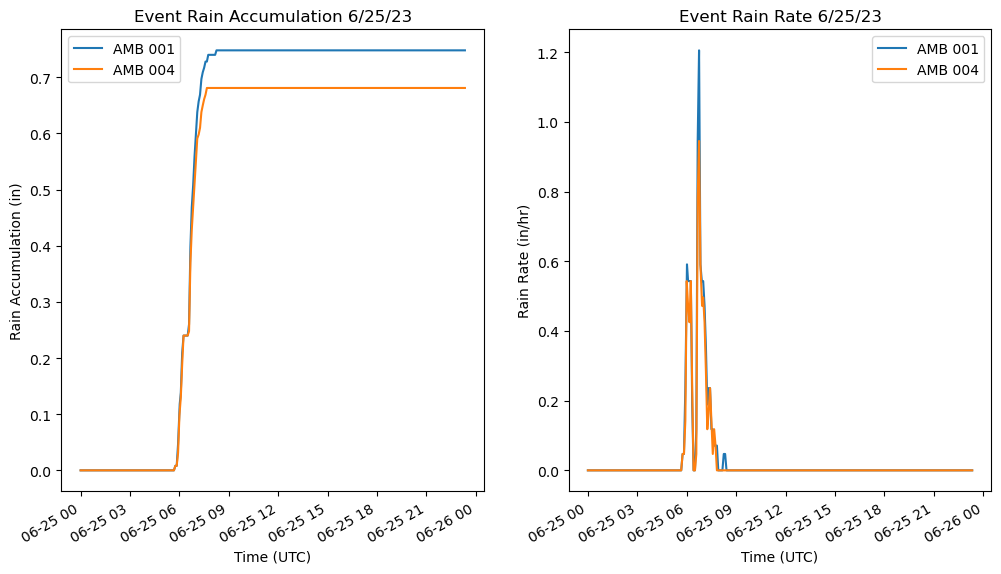

In [58]:
############################### Ambients Accumulation And Rain Rate ###############################
#define the variables 
rain_001 = ds_ambient_001.event_rain
rain_004 = ds_ambient_004.event_rain

rain_rate_001=ds_ambient_001.hourly_rain
rain_rate_004=ds_ambient_004.hourly_rain

#figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#the plot info
rain_001.plot(ax=ax1, label='AMB 001')
rain_004.plot(ax=ax1, label='AMB 004')
ax1.set_title('Event Rain Accumulation 6/25/23')
ax1.set_xlabel('Time (UTC)')
ax1.set_ylabel('Rain Accumulation (in)')
ax1.legend()

#Plotting intensity data
rain_rate_001.plot(ax=ax2, label='AMB 001')
rain_rate_004.plot(ax=ax2, label='AMB 004')

ax2.set_title('Event Rain Rate 6/25/23')
ax2.set_xlabel('Time (UTC)')
ax2.set_ylabel('Rain Rate (in/hr)')
ax2.legend()

# Show the plot
plt.show()


### Analyze the FD70 Rain Rate

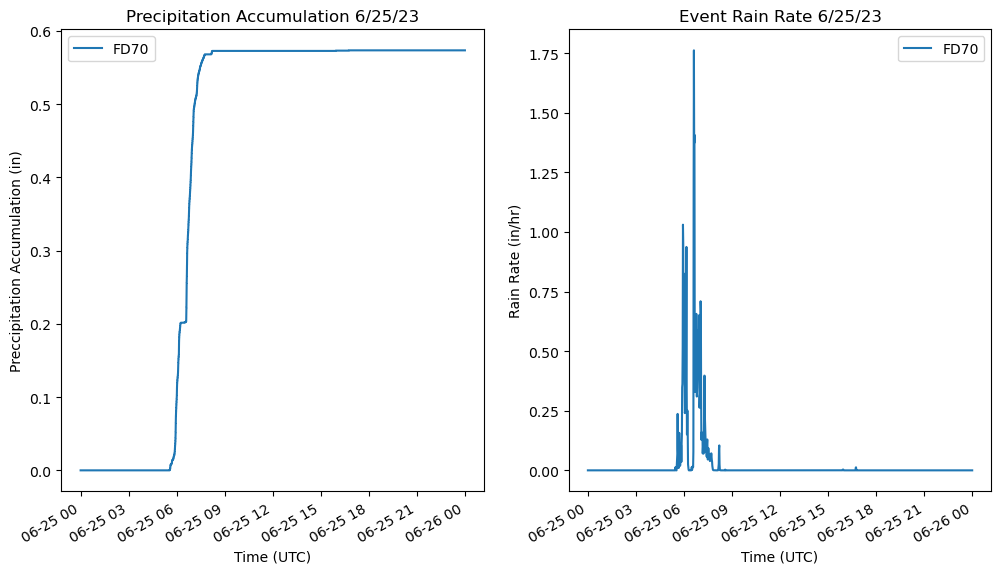

In [48]:
#define the variables
precip_accum = ((ds.precip_accumulation/25.6)-(ds.precip_accumulation[0]/25.6))

precip_inten_avg = ds.precip_intensity.resample(time='1min').mean()
precip_int = (precip_inten_avg/25.6)-(precip_inten_avg[0]/25.6)

#figure size etc.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#Plotting accumulationdata
precip_accum.plot(ax=ax1, label='FD70')

ax1.set_title('Precipitation Accumulation 6/25/23')
ax1.set_xlabel('Time (UTC)')
ax1.set_ylabel('Preccipitation Accumulation (in)')
ax1.legend()


#Plotting intensity data
precip_int.plot(ax=ax2, label='FD70')

ax2.set_title('Event Rain Rate 6/25/23')
ax2.set_xlabel('Time (UTC)')
ax2.set_ylabel('Rain Rate (in/hr)')
ax2.legend()

# Show the plot
plt.show()

### Compare the Accumulation Between Ambients and FD70

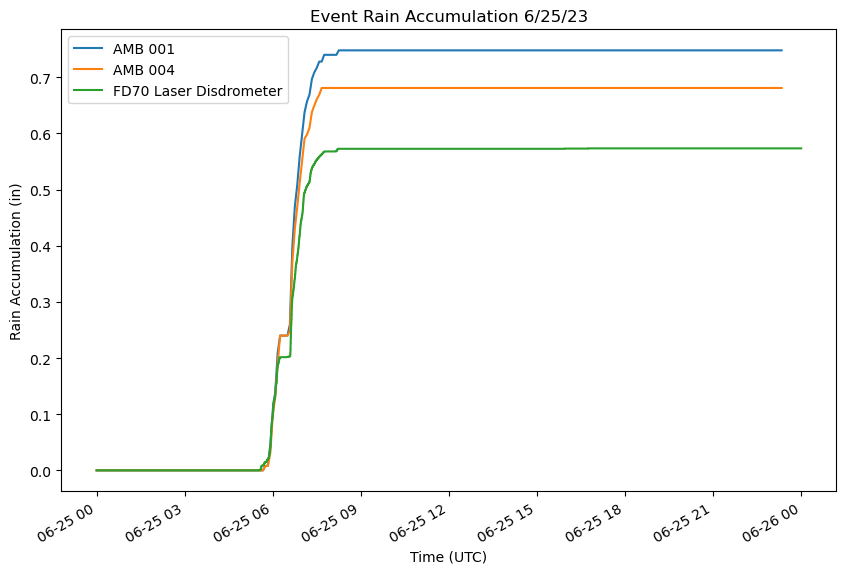

In [60]:
#Rain Accumulation Plots

### Plotting Ambient rain total data ###
#declare the variables
rain_001 = ds_ambient_001.event_rain
rain_004 = ds_ambient_004.event_rain
precip_accum = ((ds.precip_accumulation/25.6)-(ds.precip_accumulation[0]/25.6))

#figure with two subplots
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))

#the plot info
rain_001.plot(ax=ax1, label='AMB 001')
rain_004.plot(ax=ax1, label='AMB 004')
precip_accum.plot(ax=ax1, label='FD70 Laser Disdrometer')
ax1.set_title('Event Rain Accumulation 6/25/23')
ax1.set_xlabel('Time (UTC)')
ax1.set_ylabel('Rain Accumulation (in)')
ax1.legend()

# Show the two plots 
plt.show()

## Check Relationship Between Ambients
We are interested in a line of best fit and correlation statistics between the two ambient sensors

In [99]:
data1 = ds_ambient_001.event_rain
data2 = ds_ambient_004.event_rain

# Use scipy stats to run a linear regression
res = stats.linregress(data1, data2)
res

LinregressResult(slope=0.9102977579361256, intercept=0.0008154003706927759, rvalue=0.9999353390853578, pvalue=nan, stderr=nan, intercept_stderr=nan)

Determine the maximum value to plot for the line of best fit.

In [100]:
data1 = data1.squeeze().values
maximum = data1.max()

### Plot the Comparison and Line of Best Fit

correlation = 0.9999353390853578


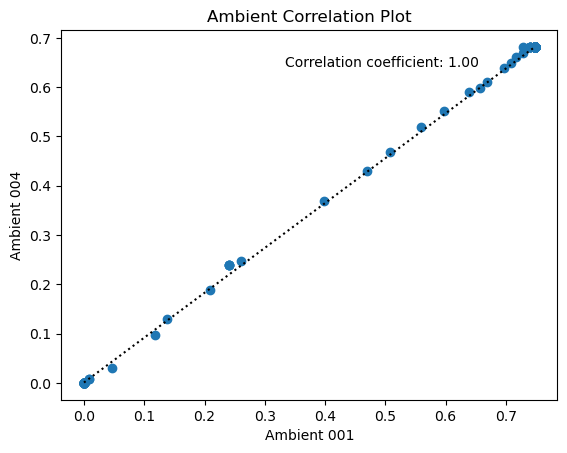

In [97]:
#Correlation plot for the 2 ambients

#ambient variables
data1 = ds_ambient_001.event_rain
data2 = ds_ambient_004.event_rain

#create the correlation
correlation = np.corrcoef(data1, data2)[0, 1]
print ("correlation =", correlation)

#plotting the 
plt.plot([0, maximum], [res.intercept, (res.slope * maximum) + res.intercept],
         label=f'Best Fit Line y = {round(res.slope, 2)}x + {round(res.intercept, 2)}',
         linestyle=':',
         color='k')
plt.scatter(data1, data2)
plt.title('Ambient Correlation Plot')
plt.xlabel('Ambient 001')
plt.ylabel('Ambient 004')
plt.text(0.45, 0.9, f'Correlation coefficient: {correlation:.2f}', transform=plt.gca().transAxes)
plt.show()

